
## Would you have survived the Titanic?
### Challenge
Predict whether a passenger on the titanic would have been survived or not

### Workflow stages

1. Defining the Question or problem 
2. Data Munging 
3. Exploratory Data Analysis
4. Feature Engineering
5. Model Classification
6. Model Evaluation

In [362]:
#import Libraries

#linear algebra
import numpy as np 

#data processing
import pandas as pd

#data visualization
import matplotlib.pyplot as plt  
import seaborn as sns 

#algorithms
import xgboost as xgb
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB



In [363]:
#Load the data
titanic_df = pd.read_csv('Titanic-Dataset.csv')


### Data Munging
Check for data validity, completeness, consistency and accuracy

In [364]:
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The data has 891 rows/passengers, 11 columns/features + the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects.

In [365]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can see that 38% out of the training set survived the Titanic. We can also see that the ages of the passengers range from 0.4 to 80

In [366]:
#preview the data
titanic_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


From the data, we can note a few things. First is that we need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them. Furthermore, we can see that the features have widely different ranges, that we will need to convert into roughly the same scale. We can also spot some more features, that contain missing values (NaN = not a number), that we need to deal with.

**Duplicated records**

In [367]:

print('The number of duplicated Record in the titanic dataset:', titanic_df.duplicated().sum())


The number of duplicated Record in the titanic dataset: 0


**Missing values**

In [368]:
def missing_values_table(df):
   
   # Total missing values
   mis_val = df.isnull().sum()
   
   # Percentage of missing values
   mis_val_percent = 100 * df.isnull().sum() / len(df)
   # Make a table with the results
   mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1, keys=['Missing Values', '% of Total Values'])
   
   # Sort the table by percentage of missing descending
   # .iloc[:, 1]!= 0: filters table to only include missing values
   mis_val_table_ren_columns = mis_val_table[
       mis_val_table.iloc[:,1] != 0].sort_values(
   '% of Total Values', ascending=False).round(2)  
   
   # Print some summary information
   print("Your selected dataframe has {} columns.".format(df.shape[1]) + '\n' +
   "There are {} columns that have missing values.".format(mis_val_table_ren_columns.shape[0]))
   
   return mis_val_table_ren_columns
   

In [369]:
missing_values_table(titanic_df)

Your selected dataframe has 12 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22


The Embarked feature has only 2 missing values, which can easily be filled. It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values. The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.



In [370]:
#dimensionality reduction through dropping
titanic_df.drop(['Cabin'],axis=1, inplace=True)

In [371]:
#impute missing values on age column with median 

titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

In [372]:
#impure missing values on Embarked column with mode
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

**Categorical variables**

In [373]:
#object to categorical
col_cat = ['Sex', 'Name', 'Embarked', 'Ticket']
titanic_df[col_cat] = titanic_df[col_cat].astype('category')
titanic_df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Embarked       category
dtype: object

In [374]:
#Let's observe the columns
titanic_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'], dtype=object)

Above you can see the 11 features + the target variable (survived). What features could contribute to a high survival rate ?

To me, it seems every feature other than the "PassengerId", "Ticket" and "Name" would be correlated with a high survival rate

### Exploratory Data Analysis

Analyze, identify patterns, and explore the data Analysis

In [375]:
#statistical summary
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Age'>

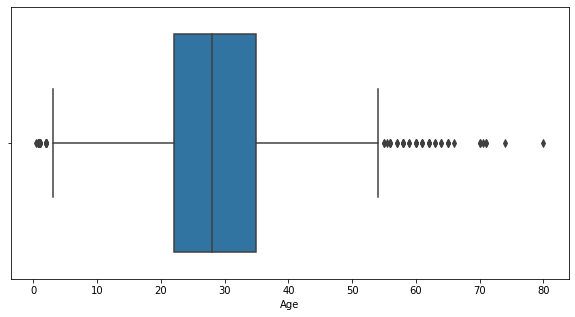

In [376]:
#Check for outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=titanic_df, x='Age')

Let's visualization the count of survivors for the features

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


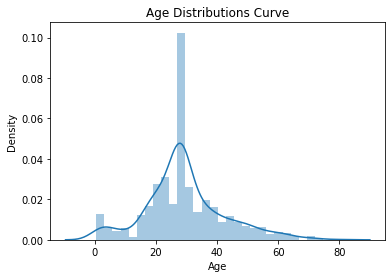

In [377]:
# A bar graph that represents how age was distributed in the titanic_df dataset

sns.distplot(titanic_df['Age'], kde=True)
plt.title('Age Distributions Curve')
plt.show()

The age of the victims was normally distributed, with most of the victims in the age blacket of between 20-40.

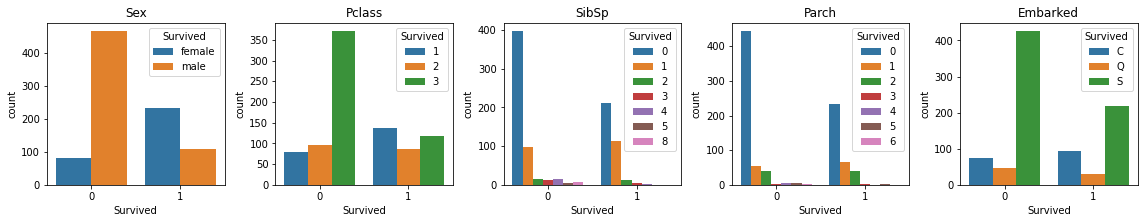

In [378]:
cols = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']
n_rows = 1
n_cols = 5
# The subplot grid and the figure size of each graph
# This returns a Figure (fig) and an Axes Object (axs)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2,n_rows*3.2))
for i, ax in enumerate(axs):
    sns.countplot(x="Survived", hue=cols[i], data=titanic_df, ax=ax)
    ax.set_title(cols[i])
    ax.legend(title="Survived", loc='upper right')
plt.tight_layout() #tight_layout


In [379]:
#look at survival rate by sex
titanic_df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


From the table above, we can see that bout 74.2% of females survived and only 18.89% of males survived.

In [380]:
#look at the survival rate by sex and class
titanic_df.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Fewer people survived in the 3rd class than in the other two classes

<AxesSubplot:>

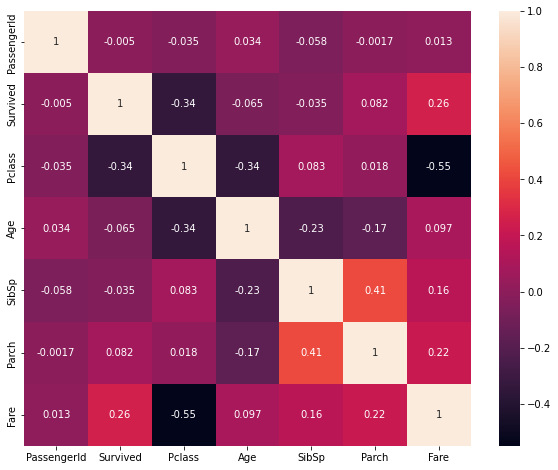

In [381]:
# checking  correlation
f, ax = plt.subplots(figsize=(10, 8))
corr = titanic_df.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
          annot = True)
# there is very  low correaltion  between the varaibles

There is very low correlation between the variables.



In [382]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

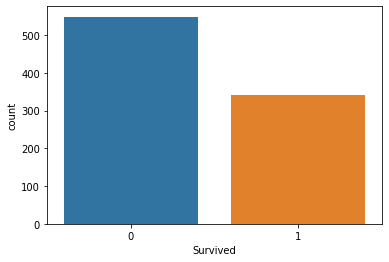

In [383]:
#visualize the count of number of survivors (Target Variable)
sns.countplot(x='Survived', data=titanic_df, label="Count")


### Feature Engineering

#### Converting features

In [384]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(2), int64(5)
memory usage: 115.1 KB


First, I will drop ‘PassengerId’ from the dataset, because it does not contribute to a persons survival probability.

In [385]:
titanic_df = titanic_df.drop(['PassengerId'], axis=1)


Columns ‘Fare’ and 'Age' are floats and we have to deal with 4 categorical features: Name, Sex, Ticket and Embarked. Lets investigate and transfrom one after another.



###### Fare and Age

In [386]:
data = [titanic_df]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset['Age'] = dataset['Age'].fillna(0)
    dataset['Age'] = dataset['Age'].astype(int)



In [387]:
titanic_df['Sex'].unique()

['male', 'female']
Categories (2, object): ['female', 'male']

In [388]:
#Let's map the sex variables to binary values: 1 on male and 0 on female
Sex = {'male' : '1', 'female': '0'}
dataset = [titanic_df]
for data in dataset:
    data['Sex'] = data['Sex'].map(Sex)


In [389]:
titanic_df['Embarked'].unique()


['S', 'C', 'Q']
Categories (3, object): ['C', 'Q', 'S']

In [390]:
#Let's map the embarked variables to binary values
ports = {"S": 0, "C": 1, "Q": 2}
dataset = [titanic_df]
for data in dataset:
    data['Embarked'] = data['Embarked'].map(ports)


In [391]:
titanic_df['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

There are 681 unique tickets, it will be tricky to convert them to useful cateories. So we drop the column from the dataset.

In [392]:
titanic_df = titanic_df.drop(['Ticket'], axis=1)

In [393]:
titanic_df['Name'].describe()

count                     891
unique                    891
top       Abbing, Mr. Anthony
freq                        1
Name: Name, dtype: object

There are 891 unique names, other than it being tricky to convert them to useful categories, the Name column has no correlation with survival (Target variable). So we drop the column from the dataset.

In [394]:
titanic_df = titanic_df.drop(['Name'], axis=1)

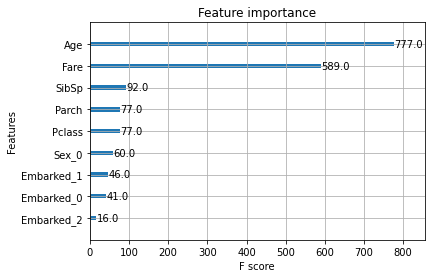

In [395]:
#Determine the feature importances
from xgboost import DMatrix, plot_importance

# Create a data matrix and target variable
X = titanic_df.drop("Survived", axis=1)
y = titanic_df["Survived"]

# Convert categorical variables to numerical
X = pd.get_dummies(X)

# Convert data and target to DMatrix
dmatrix = DMatrix(data=X, label=y, enable_categorical=True)
# Train an XGBoost classifier
model = xgb.XGBClassifier()
model.fit(X, y)

# Plot feature importances
plot_importance(model)
plt.show()

Splitting the titanic_df dataset to 80% training set and 20 testing set

In [396]:
#seperating the data to dependent y and independent X variables
y = titanic_df['Survived']

X = titanic_df.drop('Survived', axis=1)

In [397]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##### Feature Scaling

In [398]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Modelling

**1. K-Nearest Neighbors (KNN)**

In [399]:
knn = KNeighborsClassifier(n_neighbors=50, weights='distance', metric='minkowski', p=4, leaf_size=30)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
knn_score = round(knn.score(X_train, y_train) * 100, 2)


__2. Stochastic Gradient Descent(SGD)__

In [400]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)
sgd_score = round(sgd.score(X_train, y_train)* 100, 2)

**3. Random Forest**

In [401]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest = random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)

__4. Logsistic Regression__

In [402]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
logreg_score = round(logreg.score(X_train, y_train) * 100, 2)

**5. Gaussian Naive Bayes**



In [403]:
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  

y_pred = gaussian.predict(X_test)  
gaussian_score = round(gaussian.score(X_train, y_train) * 100, 2)

**6. Linear Support Vector Machine**



In [404]:
linear_svc = SVC(kernel = 'linear', random_state = 0)
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)
linear_svc_score = round(linear_svc.score(X_train, y_train) * 100, 2)

__7. Non-Linear Support Vector Machine__


In [405]:
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)
svc_rbf_score = round(svc_rbf.score(X_train, y_train) * 100, 2)

__8. Decision Tree__



In [406]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  

y_pred = decision_tree.predict(X_test)  
decision_tree_score = round(decision_tree.score(X_train, y_train) * 100, 2)

__9. Perceptron__



In [407]:
perceptron = Perceptron(max_iter=15)
perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_test)
perceptron_score = round(perceptron.score(X_train, y_train) * 100, 2)

### Evaluation
#### What is the best model?



In [408]:
results = pd.DataFrame({'Model': ['KNN', 'Stochastic Gradient Decent','Random Forest', 'Logistic Regression', 
              'Gaussian Naive Bayes', 'Linear SVM', 'Non-Linear SVM',
              'Decision Tree', 'Perceptron'], 'Score': [knn_score, sgd_score, random_forest_score, logreg_score, gaussian_score, linear_svc_score, svc_rbf_score, decision_tree_score, perceptron_score] })

results_df = results.sort_values(by='Score', ascending=False)
results_df = results_df.set_index('Score')
results_df

,Model
Score,
95.79,KNN
95.79,Random Forest
95.79,Decision Tree
84.55,Non-Linear SVM
79.35,Logistic Regression
79.07,Gaussian Naive Bayes
78.79,Perceptron
78.65,Linear SVM
78.09,Stochastic Gradient Decent


##### Further Evaluation

**Confusion Matrix**

In [409]:
#Obtain the confusion matrix of the above predicted models
from sklearn.metrics import confusion_matrix

models = [knn, sgd, random_forest, logreg, gaussian, linear_svc, decision_tree, svc_rbf, perceptron]             
for i in range(len(models)):
    cm = confusion_matrix(y_test, models[i].predict(X_test))
    TN, FP, FN, TP = confusion_matrix(y_test, models[i].predict(X_test)).ravel()
    
    print(cm)
    print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
    print()# Print a new line


[[94 16]
 [21 48]]
Model[0] Testing Accuracy = "0.7932960893854749 !"

[[99 11]
 [27 42]]
Model[1] Testing Accuracy = "0.7877094972067039 !"

[[99 11]
 [19 50]]
Model[2] Testing Accuracy = "0.8324022346368715 !"

[[93 17]
 [15 54]]
Model[3] Testing Accuracy = "0.8212290502793296 !"

[[90 20]
 [17 52]]
Model[4] Testing Accuracy = "0.7932960893854749 !"

[[92 18]
 [20 49]]
Model[5] Testing Accuracy = "0.7877094972067039 !"

[[98 12]
 [24 45]]
Model[6] Testing Accuracy = "0.7988826815642458 !"

[[100  10]
 [ 22  47]]
Model[7] Testing Accuracy = "0.8212290502793296 !"

[[97 13]
 [25 44]]
Model[8] Testing Accuracy = "0.7877094972067039 !"



The model that I will use to predict if I would’ve survived, will be the model at position 2, the Random Forest Classifier.


I choose that model because it did best on the training and testing data and has an accuracy of 83.24% on the testing data and 95.79% on the training data.




**Now we can get the important features**

In [410]:
forest = models[2]
importances = pd.DataFrame({'feature':titanic_df.iloc[:, 1:8].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Age,0.300
Sex,0.265
Fare,0.211
Pclass,0.085
SibSp,0.053
Parch,0.044
Embarked,0.042


**Visualize the important features**

<AxesSubplot:xlabel='feature'>

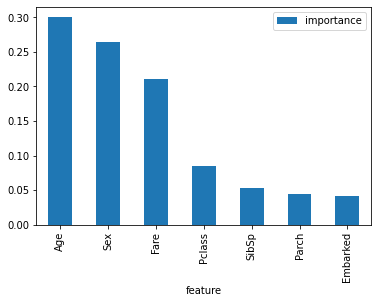

In [411]:
importances.plot.bar()


Print the Random Forest Classifier Model predictions for each passenger and, below it, print the actual values. Remember ‘1’ means the passenger survived and ‘0’ means the passenger did not survive.

By printing both we can visually see how well the model did on the test data, but remember the model was 83.24% accurate on the testing data.

In [412]:
#Print Prediction of Random Forest Classifier model
pred = models[2].predict(X_test)
print("Prediction:")
print(pred)

#Print a space
print()

#Print the actual values
print("Actual Values:")
print(y_test)



Prediction:
[0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0
 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]

Actual Values:
495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64


Now that we have analyzed the data, created our models, and chosen a model to predict who would’ve survived the Titanic, let’s test and see if I would have survived.



**My features**

* I will have a pclass = 3, meaning I would probably be in the third class because of the cheaper price.
* I am a female, so sex = 0.
* I am older than 18, so I will put age = 21.
* Most likely, I would not be on the ship with siblings or spouses, so sibsp = 0.
* Nor with any children or parents, so parch = 0.
* I would try to pay the minimum fare, so fare = 0.
* I would’ve embarked from Queenstown, so embarked = 2.

In [413]:
#Let's put those values in an array
my_survival = [[3,0,21,0, 0, 0, 2]]

#Print Prediction of Random Forest Classifier model
pred = models[2].predict(my_survival)
print(pred)

if pred == 0:
  print('Oh no! You did not make it')
else:
  print('Nice! You survived')


[0]
Oh no! You did not make it


Looks like I would not have survived the Titanic if I was on board.

